#Spy, Stub and Mock

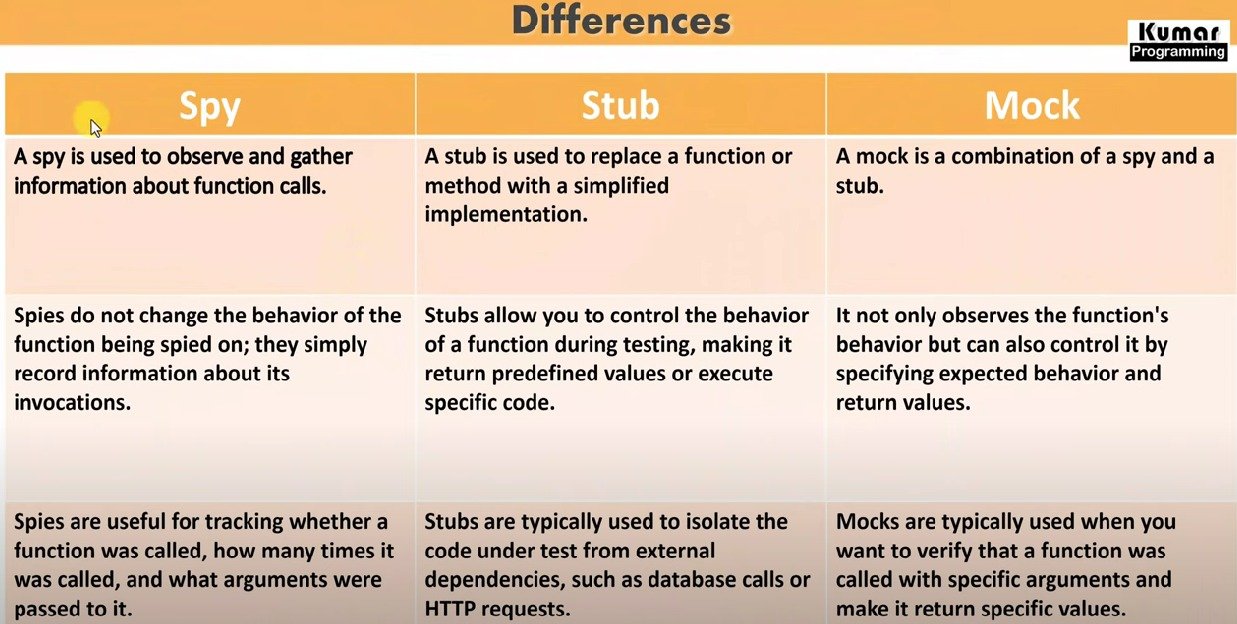

In [ ]:
%%writefile repository.py
# repository.py

class UserRepository:
    def find_user_by_id(self, user_id):
        # Simulate fetching user data from database
        # In a real scenario, interact with a database
        return {'id': user_id, 'name': 'John Doe'}

Overwriting repository.py


In [ ]:
%%writefile service.py
# service.py

from repository import UserRepository

class UserService:
    def __init__(self, user_repository):
        self.user_repository = user_repository

    def get_user_name(self, user_id):
        user = self.user_repository.find_user_by_id(user_id)
        return user['name']

Overwriting service.py


In [ ]:
%%writefile controller.py
# controller.py

from service import UserService

class UserController:
    def __init__(self, user_service):
        self.user_service = user_service

    def get_user_name(self, user_id):
        user_name = self.user_service.get_user_name(user_id)
        return user_name


Overwriting controller.py


In [ ]:
%%writefile test_repository.py
# test_repository.py

import pytest
from repository import UserRepository

def test_find_user_by_id():
    repository = UserRepository()
    user_data = repository.find_user_by_id(123)
    assert user_data['name'] == 'John Doe'


Overwriting test_repository.py


In [ ]:
%%writefile test_service.py
# test_service.py

import pytest
from service import UserService
from pytest_mock import mocker
from repository import UserRepository

def test_get_user_name(mocker):
    user_repository = UserRepository()
    mocker.patch.object(user_repository, 'find_user_by_id', return_value={'id': 123, 'name': 'Jane Doe'})

    service = UserService(user_repository)
    user_name = service.get_user_name(123)

    assert user_name == 'Jane Doe'

Overwriting test_service.py


In [ ]:
%%writefile test_controller.py
# test_controller.py

import pytest
from pytest_mock import mocker
from controller import UserController
from service import UserService

def test_get_user_name(mocker):
    mock_service = mocker.Mock(spec=UserService)
    mock_service.get_user_name.return_value = 'Jane Doe'

    controller = UserController(mock_service)
    user_name = controller.get_user_name(123)

    assert user_name == 'Jane Doe'
    mock_service.get_user_name.assert_called_once_with(123)


Overwriting test_controller.py


In [ ]:
!pip install pytest_mock

In [ ]:
!pytest test_repository.py
!pytest test_service.py
!pytest test_controller.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0
rootdir: /content
plugins: mock-3.14.0, anyio-3.7.1
collected 1 item                                                                                   

test_repository.py .                                                                         [100%]

======================================== 1 passed in 0.01s =========================================
======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0
rootdir: /content
plugins: mock-3.14.0, anyio-3.7.1
collected 1 item                                                                                   

test_service.py .                                                                            [100%]

======================================== 1 passed in 0.02s ========

In [ ]:
%%writefile test_service_with_stub.py
# test_service_with_stub.py

import pytest
from service import UserService
from repository import UserRepository

def test_get_user_name_with_stub(mocker):
    # Create a stub function to replace UserRepository.find_user_by_id
    def stub_find_user_by_id(user_id):
        return {'id': user_id, 'name': 'Jane Doe'}

    # Replace UserRepository.find_user_by_id with the stub function
    mocker.patch.object(UserRepository, 'find_user_by_id', side_effect=stub_find_user_by_id)

    # Initialize the UserService
    service = UserService(UserRepository())

    # Call the method under test
    user_name = service.get_user_name(123)

    # Verify the expected behavior
    assert user_name == 'Jane Doe'

Writing test_service_with_stub.py


In [ ]:
%%writefile test_service_with_spy.py
# test_service_with_spy.py

import pytest
from unittest.mock import MagicMock
from service import UserService
from repository import UserRepository

def test_get_user_name_with_spy():
    # Create a mock UserRepository instance
    user_repository = UserRepository()

    # Wrap the original find_user_by_id method with a MagicMock to track invocations
    original_find_user_by_id = user_repository.find_user_by_id
    user_repository.find_user_by_id = MagicMock(wraps=original_find_user_by_id)

    # Initialize the UserService with the mocked UserRepository
    user_service = UserService(user_repository)

    # Call the method under test
    user_name = user_service.get_user_name(123)

    # Verify that find_user_by_id was called with the correct argument
    user_repository.find_user_by_id.assert_called_once_with(123)

    # Assuming UserRepository returns user data based on user_id (not stubbed here)
    # Add additional assertions as needed based on UserRepository behavior


Overwriting test_service_with_spy.py


In [ ]:
!pytest test_service_with_stub.py
!pytest test_service_with_spy.py

======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0
rootdir: /content
plugins: mock-3.14.0, anyio-3.7.1
collected 1 item                                                                                   

test_service_with_stub.py .                                                                  [100%]

======================================== 1 passed in 0.01s =========================================
======================================= test session starts ========================================
platform linux -- Python 3.10.12, pytest-7.4.4, pluggy-1.5.0
rootdir: /content
plugins: mock-3.14.0, anyio-3.7.1
collected 1 item                                                                                   

test_service_with_spy.py .                                                                   [100%]

======================================== 1 passed in 0.02s ========

In [ ]:
%pip install mock

In [ ]:
import mock

class ClassUnderTest(object):
    def lower_1(self):
        print('lower_1')

    def lower_2(self):
        print('lower_2')

    def higher(self):
        self.lower_1()
        self.lower_2()

DUT = ClassUnderTest()
spy = mock.Mock(spec=DUT)
# test call
ClassUnderTest.higher(spy)

# Assert that lower_1 was called before lower_2
assert spy.mock_calls == [mock.call.lower_1(), mock.call.lower_2()]